## NAME: Bhargavi Poyekar
## BE COMPS
## Batch-B
## UID: 2018130040

### Aim: Predict a car's fuel economy from its physical parameters such as weight and engine size and power

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data from CSV file

In [117]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin','Car_Name'] 

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', names=column_names,
                      na_values = "?",
                      sep=r"\s+", skipinitialspace=True) 
# separator variable used to separate the columns is white space

In [118]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car_Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# Data Preprocessing 

## Data Cleaning



The "Car Name" column has some spelling mistakes which have to be corrected. 

In [119]:
correct_spellings = {'chevroelt': 'chevrolet',
                   'chevy': 'chevrolet',
                   'vokswagen': 'volkswagen',
                   'vw': 'volkswagen',
                   'hi': 'harvester',
                   'maxda': 'mazda',
                   'toyouta': 'toyota',
                   'mercedes-benz': 'mercedes'}

Also, the "Car_Name" column has Brand Name followed by Model of the car. So we can extract these into two different features. 

In [120]:
df['brand'] = [correct_spellings[key].title() if key in correct_spellings else \
               key.title() for key in [i.split()[0] for i in df['Car_Name']]]

df['model'] = [' '.join(i.split()[1:]).title() for i in df['Car_Name']]
df = df.drop(columns = 'Car_Name', axis = 0)
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,brand,model
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,Chevrolet,Chevelle Malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,Buick,Skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,Plymouth,Satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,Amc,Rebel Sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,Ford,Torino


In [121]:
df.shape

(398, 10)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   brand         398 non-null    object 
 9   model         398 non-null    object 
dtypes: float64(5), int64(3), object(2)
memory usage: 31.2+ KB


#### Separate Categorical and Numeric Columns

Creating a dataframe to store number of unique values for each column

In [123]:
no_unique = pd.DataFrame({'Variable': df.columns,
                               'Classes': [df[i].nunique() for i in df.columns]})

no_unique = no_unique.sort_values('Classes', ascending=False) #sort in descending order of number of unique values.
no_unique = no_unique.reset_index(drop = True) # reset the index back to the default 0, 1, 2 etc indexes.

In [124]:
no_unique

,Variable,Classes
0,Weight,351
1,model,300
2,MPG,129
3,Acceleration,95
4,Horsepower,93
5,Displacement,82
6,brand,30
7,Model Year,13
8,Cylinders,5
9,Origin,3


From the above dataframe we can see that Model, Brand, Cylinders and Origin are categorical columns

In [125]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,brand,model
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,Chevrolet,Chevelle Malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,Buick,Skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,Plymouth,Satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,Amc,Rebel Sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,Ford,Torino


In [126]:
df_clean = df.copy()

Listing categorical columns

In [127]:
cat_col = ['Origin', 'brand', 'model', 'Cylinders']

Listing numeric columns

In [128]:
num_col = ['MPG', 'Displacement', 'Horsepower', 'Weight',
           'Acceleration', 'Model Year']

Changing the datatype of categorical columns to Object

In [129]:
for col in cat_col:
    df_clean[col] = df_clean[col].astype('object') 

In [130]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    object 
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    object 
 8   brand         398 non-null    object 
 9   model         398 non-null    object 
dtypes: float64(5), int64(1), object(4)
memory usage: 31.2+ KB


From above we can see that datatype of all categorical columns is "object" and numeric columns is "float" and "int"

### Outlier Detection

Visualizing the outliers of Numeric Columns

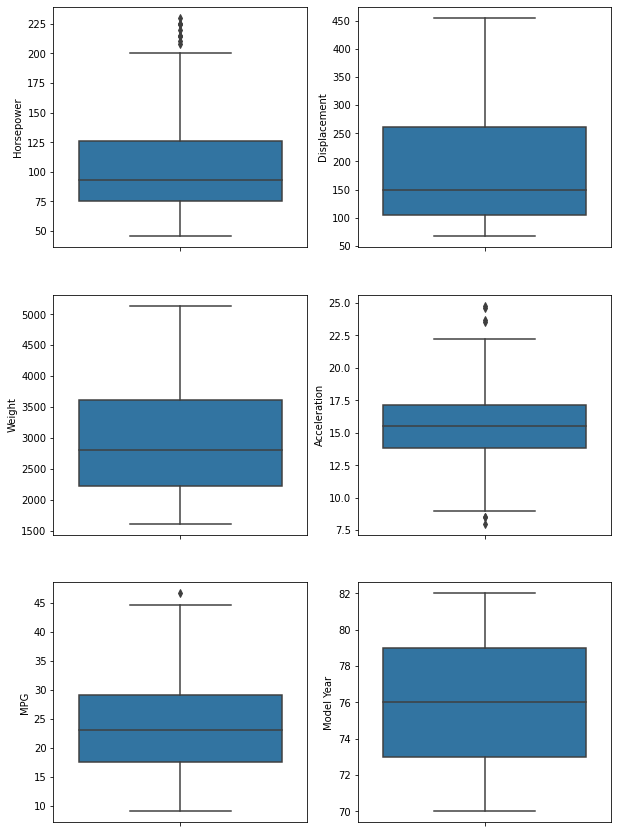

In [131]:
f, axes = plt.subplots(3, 2, figsize=(10,15))
g = sns.boxplot(data=df_clean, y='Horsepower', ax=axes[0,0])
g = sns.boxplot(data=df_clean, y='Displacement', ax=axes[0,1])
g = sns.boxplot(data=df_clean, y='Weight', ax=axes[1,0])
g = sns.boxplot(data=df_clean, y='Acceleration', ax=axes[1,1])
g = sns.boxplot(data=df_clean, y='MPG', ax=axes[2,0])
g = sns.boxplot(data=df_clean, y='Model Year', ax=axes[2,1])

From the above Box plots we can see that Horsepower and Acceleration column have Outliers

#### Replacing the outliers by Lower and Upper Limit

In [132]:
for variable in ['Horsepower', 'Acceleration']: 
    Q1 = df_clean[variable].quantile(0.25)
    Q3 = df_clean[variable].quantile(0.75)
    IQR = Q3 - Q1
    up_limit = Q3+1.5*IQR
    low_limit = Q1-1.5*IQR

    df_clean.loc[(df_clean[variable] < low_limit), variable] = low_limit
    df_clean.loc[(df_clean[variable] > up_limit), variable] = up_limit

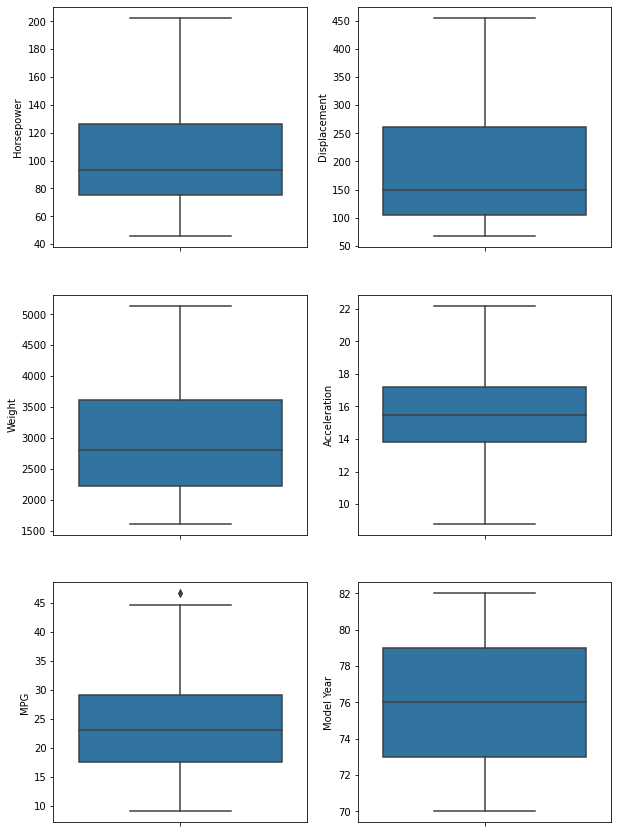

In [133]:
f, axes = plt.subplots(3, 2, figsize=(10,15))
g = sns.boxplot(data=df_clean, y='Horsepower', ax=axes[0,0])
g = sns.boxplot(data=df_clean, y='Displacement', ax=axes[0,1])
g = sns.boxplot(data=df_clean, y='Weight', ax=axes[1,0])
g = sns.boxplot(data=df_clean, y='Acceleration', ax=axes[1,1])
g = sns.boxplot(data=df_clean, y='MPG', ax=axes[2,0])
g = sns.boxplot(data=df_clean, y='Model Year', ax=axes[2,1])


Now we can see from the above boxplots that all outliers have been handled

### Handling Missing Values

In [134]:
df_clean.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
brand           0
model           0
dtype: int64

We can see that HorsePower column has 6 missing values

Converting data type of categorical columns to Categorical 

In [135]:
df_clean_temp = df_clean.copy()
for col in cat_col:

    df_clean_temp[col] = df_clean[col].astype('category').cat.codes

In [136]:
df_clean_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int8   
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int8   
 8   brand         398 non-null    int8   
 9   model         398 non-null    int16  
dtypes: float64(5), int16(1), int64(1), int8(3)
memory usage: 20.7 KB


#### Filling missing values of Horsepower column 

Finding correlation of Horsepower with other columns

In [137]:
corr= df_clean_temp.corr()
core = abs(corr.Horsepower.sort_values(ascending = False))
core.sort_values(ascending = False)

Horsepower      1.000000
Displacement    0.900759
Weight          0.874438
Cylinders       0.813979
MPG             0.788856
Acceleration    0.695466
Origin          0.461650
Model Year      0.415158
brand           0.238698
model           0.072645
Name: Horsepower, dtype: float64

We can see that among all categorical columns, Cylinders column has highest correlation with Horsepower column 

#### Plotting Histogram of Horsepower column to see that distribution

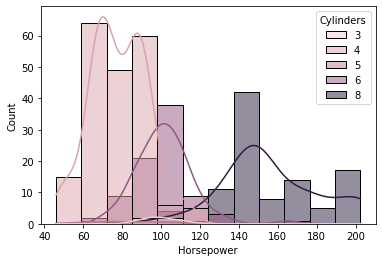

In [138]:
_ = sns.histplot(data = df_clean, x = 'Horsepower', hue = 'Cylinders',kde=True)   

From the above histogram we can see that lower the no. of Cylinders, lower is the horsepower and higher the no. of cylinders, higher is the horsepower

#### Filling missing values of Horsepower by Mean wrt Cylinders column

In [139]:
df_clean['Horsepower'] = df_clean.groupby(['Cylinders'], sort=False)['Horsepower'].apply(lambda x: x.fillna(x.mean()))

In [140]:
df_clean.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
brand           0
model           0
dtype: int64

Now all missing values have been handled

## Data Visualization

#### Correlation or variables

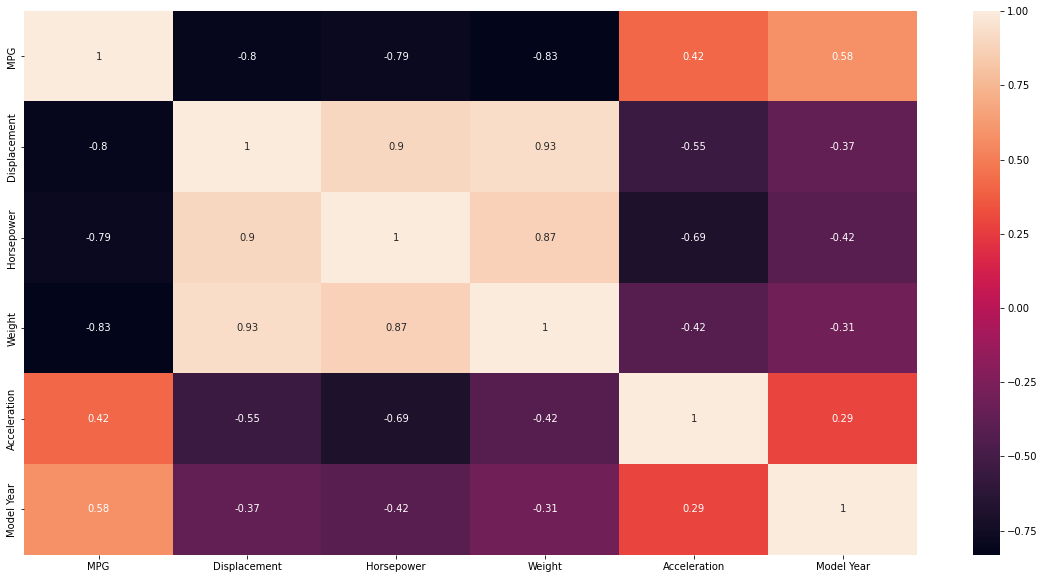

In [141]:
fig = plt.figure(figsize =(20, 10))

_=sns.heatmap(df_clean.corr(), annot = True) 


In [142]:
corr= df_clean_temp.corr()
core = abs(corr.MPG.sort_values(ascending = False))
core.sort_values(ascending = False)

MPG             1.000000
Weight          0.831741
Displacement    0.804203
Horsepower      0.788856
Cylinders       0.779120
Model Year      0.579267
Origin          0.563450
Acceleration    0.418293
brand           0.279615
model           0.140539
Name: MPG, dtype: float64

From the correlation matrix, we can see that Horsepower,cylinders, displacement, weight have the highest correlation with MPG column 

#### Countplot of Origin Column 

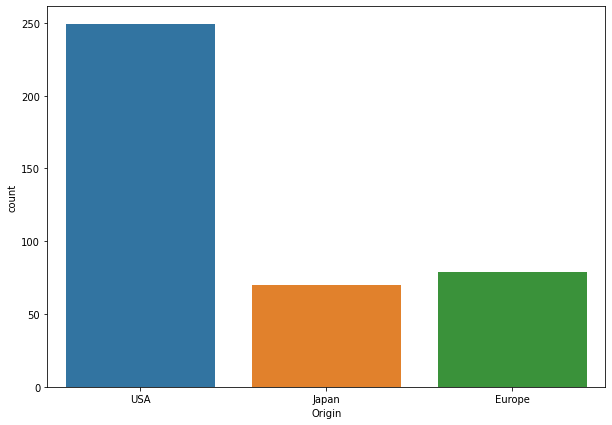

In [143]:
fig = plt.figure(figsize =(10, 7))
g = sns.countplot(data = df_clean, x='Origin')
g.set_xticklabels(['USA','Japan','Europe']);

We can see that most of cars are from USA

#### Countplot of Cylinders Variable 

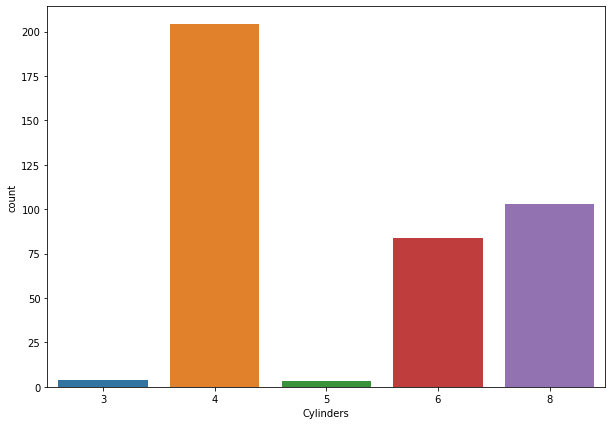

In [144]:
fig = plt.figure(figsize =(10, 7))
g = sns.countplot(data = df_clean, x='Cylinders')

Most of the cars have 4 Cylinders 

#### Year Wise fuel consumption

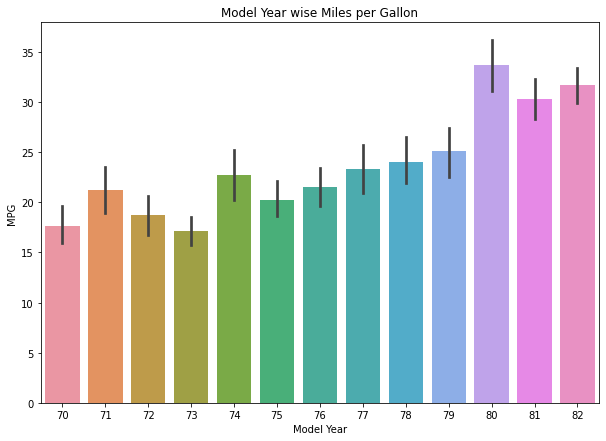

In [145]:
fig = plt.figure(figsize =(10, 7))
g = sns.barplot(data=df_clean, x="Model Year", y="MPG" );
_ = plt.title('Model Year wise Miles per Gallon')

From the above Bargraph we can see that the MPG limit mostly increases with model year. Model Year 1980 had the MPG limit.   

##Relationships with respect to cylinders

#### Relationship between Horsepower and Weight

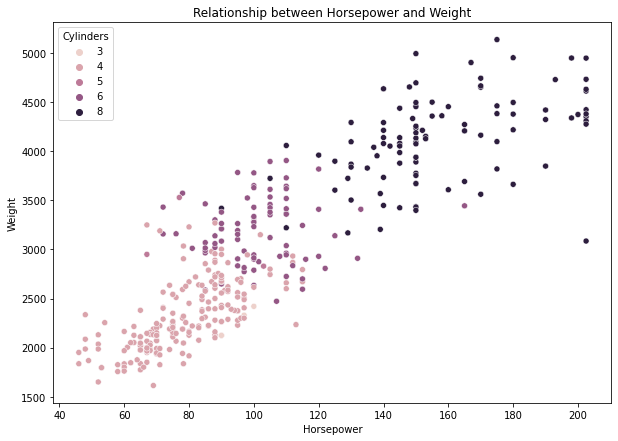

In [146]:
fig = plt.figure(figsize =(10, 7))
g = sns.scatterplot(data = df_clean, x = 'Horsepower', y ='Weight', hue='Cylinders')
_ = plt.title('Relationship between Horsepower and Weight')

We can see from the scatterplot that Horsepower and Weight have good correlation with each other. As the no. of Cylinders increases, horsepower and weight also increases. 

#### Relationship between Horsepower and Displacement

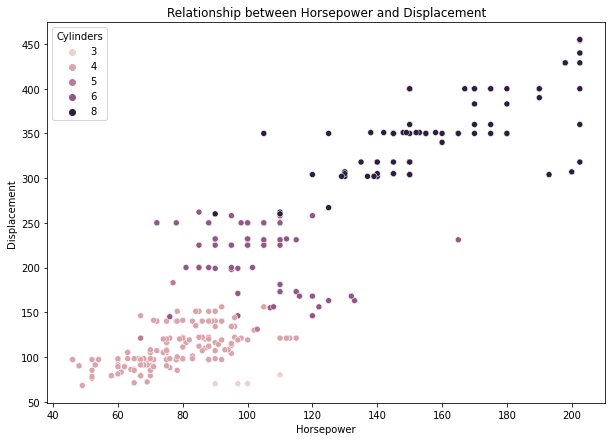

In [147]:
fig = plt.figure(figsize =(10, 7))
g = sns.scatterplot(data = df_clean, x = 'Horsepower', y ='Displacement', hue='Cylinders')
_ = plt.title('Relationship between Horsepower and Displacement')

We can see from the scatterplot that Horsepower and Displacement have correlation with each other. As the no. of Cylinders increases, horsepower and Displacement also increases. 

#### Relationship between MPG and Displacement

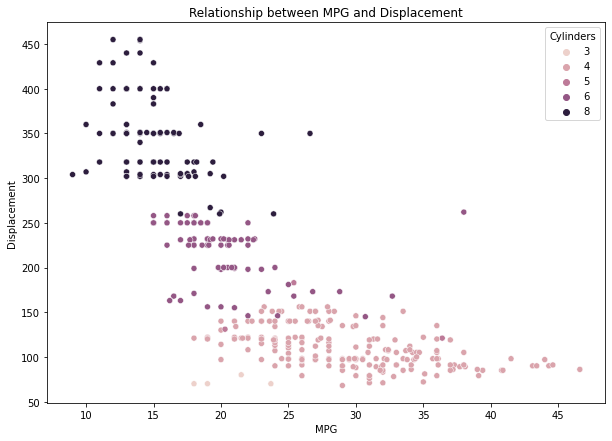

In [148]:
fig = plt.figure(figsize =(10, 7))
g = sns.scatterplot(data = df_clean, x = 'MPG', y ='Displacement', hue='Cylinders')
_ = plt.title('Relationship between MPG and Displacement')

We can see from the scatterplot that MPG and Displacement have negative correlation with each other. As the no. of Cylinders decreases, MPG increases. 

#### Relationship between MPG and Weight

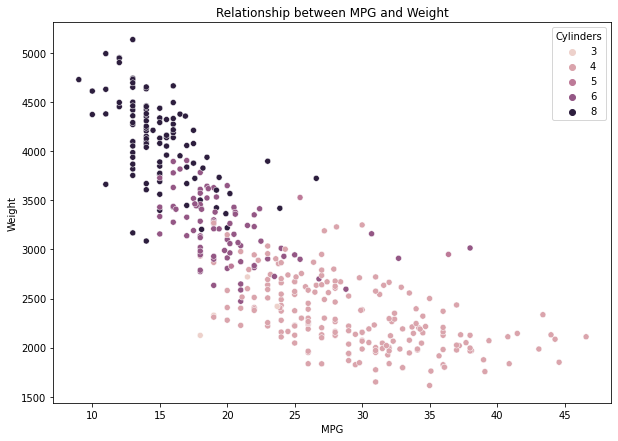

In [149]:
fig = plt.figure(figsize =(10, 7))
g = sns.scatterplot(data = df_clean, x = 'MPG', y ='Weight', hue='Cylinders')
_ = plt.title('Relationship between MPG and Weight')

We can see from the scatterplot that MPG and Weight have negative correlation with each other. As the no. of Cylinders decreases, MPG increases. 

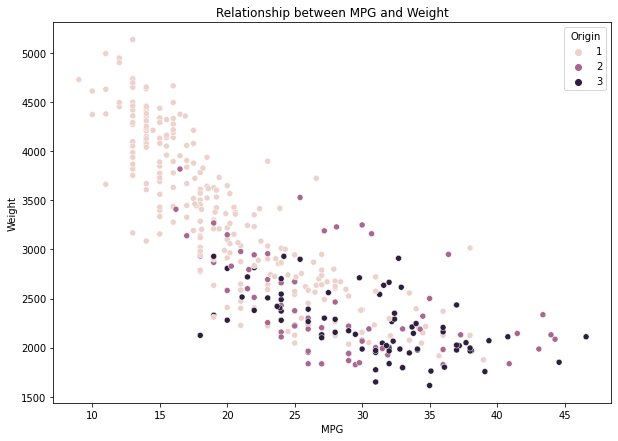

In [167]:
fig = plt.figure(figsize =(10, 7))
g = sns.scatterplot(data = df_clean, x = 'MPG', y ='Weight', hue='Origin')
_ = plt.title('Relationship between MPG and Weight')

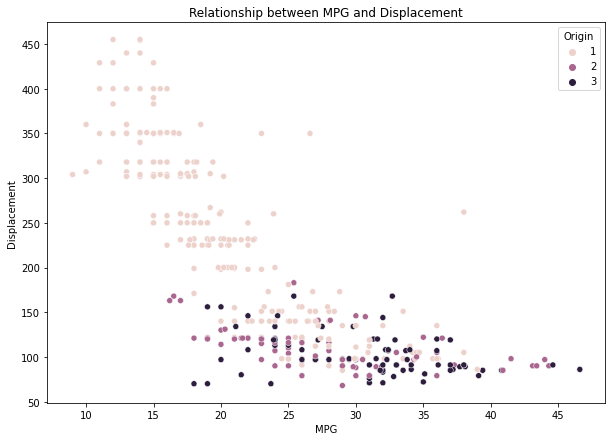

In [169]:
fig = plt.figure(figsize =(10, 7))
g = sns.scatterplot(data = df_clean, x = 'MPG', y ='Displacement', hue='Origin')
_ = plt.title('Relationship between MPG and Displacement')

#### Distribution of MPG

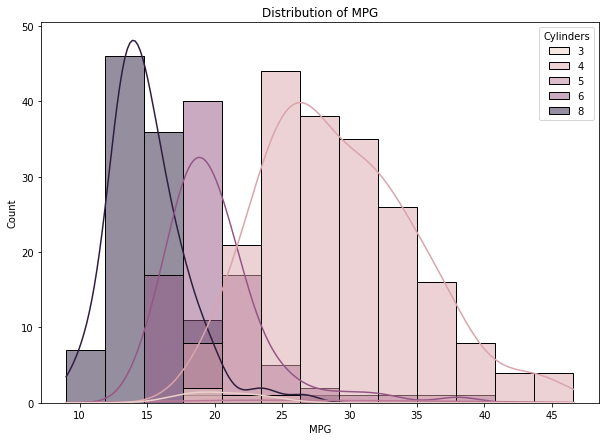

In [150]:
fig = plt.figure(figsize =(10, 7))
_ = sns.histplot(data = df_clean, x = 'MPG', hue = 'Cylinders',kde=True)   
_ = plt.title('Distribution of MPG')

MPG has a slightly skewed distribution. Also MPG has correlation with Cylinders variable, MPG decreases with increasing no. of cylinders

#### Brands with Highest Fuel consumption

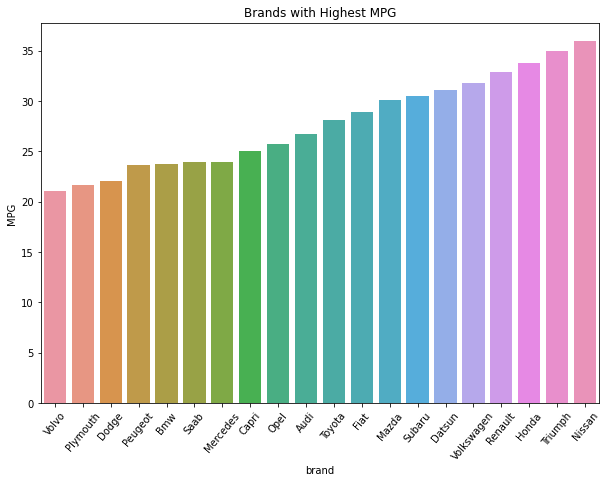

In [151]:
fig = plt.figure(figsize =(10, 7))
t = df_clean.groupby(by='brand').mean().sort_values(by='MPG').iloc[-20:]
g = sns.barplot(x=t.index, y = t['MPG']);
_  = plt.xticks(rotation=50)
_ = plt.title('Brands with Highest MPG')

From the data we can see that Nissan has the highest MPG. That means it has lowest fuel consumption

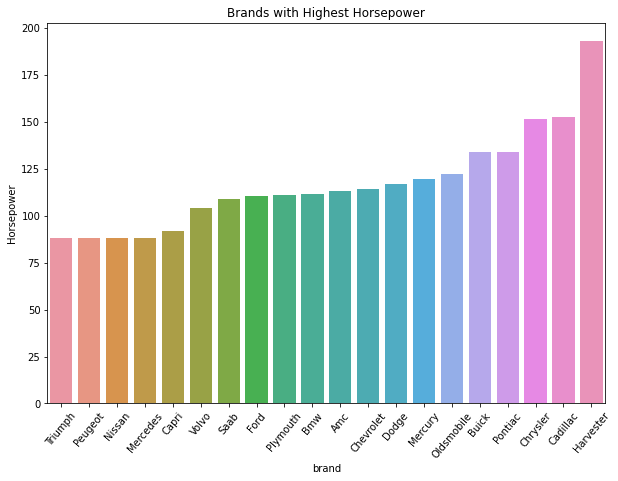

In [152]:
fig = plt.figure(figsize =(10, 7))
t = df_clean.groupby(by='brand').mean().sort_values(by='Horsepower').iloc[-20:]
g = sns.barplot(x=t.index, y = t['Horsepower']);
_  = plt.xticks(rotation=50)
_ = plt.title('Brands with Highest Horsepower')

From the data we can see that Harvester has the highest HorsePower. 

## Data Transformation and Encoding 

In [153]:
from sklearn import preprocessing                                               
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold                     
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error

In [154]:
df_pre = df_clean.copy()

In [155]:
for col in cat_col:

    df_pre[col] = df_pre[col].astype('category').cat.codes

In [156]:
df_pre["MPG"] = np.log1p(df_pre["MPG"])

In [157]:
df_pre.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,brand,model
0,2.944439,4,307.0,130.0,3504.0,12.0,70,0,6,94
1,2.772589,4,350.0,165.0,3693.0,11.5,70,0,3,270
2,2.944439,4,318.0,150.0,3436.0,11.0,70,0,21,262
3,2.833213,4,304.0,150.0,3433.0,12.0,70,0,0,252
4,2.890372,4,302.0,140.0,3449.0,10.5,70,0,11,282


#### One Hot Encoding the categorical columns

In [158]:
df_pre = pd.get_dummies(df_pre, columns = ['Origin','Cylinders','brand','Model Year'])
df_pre

,MPG,Displacement,Horsepower,Weight,Acceleration,model,Origin_0,Origin_1,Origin_2,Cylinders_0,Cylinders_1,Cylinders_2,Cylinders_3,Cylinders_4,brand_0,brand_1,brand_2,brand_3,brand_4,brand_5,brand_6,brand_7,brand_8,brand_9,brand_10,brand_11,brand_12,brand_13,brand_14,brand_15,brand_16,brand_17,brand_18,brand_19,brand_20,brand_21,brand_22,brand_23,brand_24,brand_25,brand_26,brand_27,brand_28,brand_29,Model Year_70,Model Year_71,Model Year_72,Model Year_73,Model Year_74,Model Year_75,Model Year_76,Model Year_77,Model Year_78,Model Year_79,Model Year_80,Model Year_81,Model Year_82
0,2.944439,307.0,130.0,3504.0,12.0,94,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2.772589,350.0,165.0,3693.0,11.5,270,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2.944439,318.0,150.0,3436.0,11.0,262,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,2.833213,304.0,150.0,3433.0,12.0,252,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2.890372,302.0,140.0,3449.0,10.5,282,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,3.332205,140.0,86.0,2790.0,15.6,224,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
394,3.806662,97.0,52.0,2130.0,22.2,239,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
395,3.496508,135.0,84.0,2295.0,11.6,250,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
396,3.367296,120.0,79.0,2625.0,18.6,251,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### Train Test Split

In [159]:
y = df_pre["MPG"] 
X = df_pre.drop(["MPG"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 53)

In [160]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((318, 56), (318,), (80, 56), (80,))

## Model Training

In [161]:
linearRegr = LinearRegression()   

In [162]:
linearRegr.fit(X_train, y_train)     

LinearRegression()

## Model Evaluation

In [163]:
linearRegr.score(X_train, y_train)

0.9196738749594944

In [164]:
linearRegr.score(X_test, y_test)

0.9175044711056611

In [165]:
y_pred = linearRegr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression RMSE:", mse)

Linear Regression RMSE: 0.009534598567614171


We can see that our Linear Regression model has Regression score of 92% of training and 91.75% on test dataset. Also, it has RMSE of 0.0095
. 

#### Printing Linear Regression Coefficients

In [166]:
print("LR Coef:", linearRegr.coef_, '\n')

LR Coef: [ 3.98123557e-04 -3.15233293e-03 -1.92224487e-04 -7.83786600e-03
 -1.32897301e-05 -2.57252124e-02  1.00935304e-02  1.56316820e-02
 -1.42316484e-01  8.08467676e-02  2.05984852e-02 -6.71598976e-04
  4.15428301e-02 -4.80276051e-02 -6.35811283e-02 -4.84689972e-02
  1.01418643e-02  1.90103853e-01  4.67634058e-02 -3.99891474e-02
 -2.85187558e-02  5.08058029e-02  1.25626806e-04  1.93407488e-02
 -5.19369876e-02 -1.49006441e-01 -5.48270996e-03  1.63129309e-02
  6.27479774e-02 -7.63972054e-02 -2.08166817e-17  3.46299245e-02
 -3.44553457e-02  2.31718899e-02  1.41502642e-02  7.22359916e-02
  5.27406602e-02  4.38327765e-02 -4.17676293e-02 -4.23671248e-03
 -5.55111512e-17 -2.41142257e-02 -2.11208255e-02 -8.28786265e-02
 -6.69760138e-02 -1.19601563e-01 -1.28954095e-01 -5.70615051e-02
 -5.87605523e-02 -5.65235180e-02  2.06553801e-02  2.40008683e-02
  7.46019717e-02  1.82841341e-01  1.29679697e-01  1.38976615e-01] 

